In [2]:
%reset

In [19]:
import xarray as xr
#import xclim as xc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [20]:
import os
#ROOT_DIR = os.path.abspath(os.curdir)
ROOT_DIR = '/Users/nicoleta/Desktop/code/Compare_SWE'
path_validation = ROOT_DIR + '/data/processed/df_ua_year.csv'
path_prediction = ROOT_DIR + '/data/processed/wormhole_output_6.csv'
path_prediction

'/Users/nicoleta/Desktop/code/Compare_SWE/data/processed/wormhole_output_6.csv'

In [21]:

prediction_swe = pd.read_csv(path_prediction, sep=',', header = None)

pred_trans = prediction_swe.transpose()

pred_trans

,0,1,2,3,4,5,6,7,8,9,...,20750,20751,20752,20753,20754,20755,20756,20757,20758,20759
0,Date,0001daba-dd41-4787-84ab-f7956f7829a8,0006d245-64c1-475f-a989-85f4787bae6a,000a9004-1462-4b8c-96ee-0601aff0fdf7,000ba8d9-d6d5-48da-84a2-1fa54951fae1,00118c37-43a4-4888-a95a-99a85218fda6,0013524a-f2f6-4d5c-a458-9f08a42c1228,0013ea8d-f647-4664-b40f-57bb96f800e5,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,001476f9-a9d5-4128-8210-e2c4879ce505,...,ffe249c4-19de-41eb-9611-60af5717cdf4,ffe3e71c-7254-4299-8860-277a67649358,ffe723d9-6727-46db-9e17-0627f4c2a492,ffe80f68-8363-4ef2-bc02-666ab716173b,ffeef29b-979e-4c1b-9ca6-a7ce0944af09,ffefd240-fae9-4ab2-8821-75ea2bad321d,fff08871-267e-466b-997b-3ceb3d420e75,fff54897-9676-4f7e-8e68-da7457517b7b,fffdfd4a-b421-4766-9df6-935ba7dfe029,fffeeca9-73ba-4e6c-a26e-af565d738d4f
1,2022-01-13,5.358,12.034,9.183999999999996,8.22,7.349000000000001,9.211000000000002,9.224999999999998,9.840000000000002,6.738999999999999,...,6.609000000000002,7.995,7.370999999999999,4.630000000000001,8.934999999999999,1.4480000000000002,7.4170000000000025,18.45599999999998,4.392000000000001,7.045999999999999
2,2022-01-20,8.209000000000003,12.569,13.610999999999997,10.001999999999997,9.787,9.519000000000004,14.198,15.407999999999994,3.178,...,13.820999999999993,9.260999999999994,9.237,2.3719999999999994,14.459000000000001,2.165000000000001,14.073999999999998,17.582999999999995,7.894000000000002,9.851
3,2022-01-27,6.894000000000002,14.296000000000008,17.53899999999998,6.306,11.157,11.529999999999998,8.574,20.783999999999992,3.1459999999999986,...,19.36599999999999,8.446,10.095000000000004,2.4079999999999986,14.473999999999995,2.442,14.046999999999999,17.423999999999985,8.251,9.679999999999998
4,2022-02-03,5.986999999999999,17.631000000000014,10.705,7.263000000000002,14.428000000000003,15.436999999999996,11.504999999999995,15.517000000000007,6.073000000000002,...,13.498999999999999,9.842999999999998,12.678000000000008,1.163,13.009999999999998,1.362,11.577999999999992,14.347999999999997,11.645999999999992,12.923000000000002
5,2022-02-10,9.87,17.060999999999996,14.387,1.3950000000000002,12.459999999999997,13.485999999999995,9.392999999999999,15.684999999999997,3.3369999999999997,...,15.926999999999996,4.670999999999999,10.582000000000003,1.354999999999999,15.700999999999999,0.9279999999999999,16.076999999999998,15.264000000000001,9.199,8.068
6,2022-02-17,17.186999999999998,18.94000000000001,14.407000000000009,2.425,16.419999999999998,16.84199999999999,1.078,22.97,5.702000000000003,...,25.449999999999996,15.596000000000002,13.981999999999998,1.9829999999999992,19.640000000000004,1.8259999999999998,20.091,21.493000000000002,11.817999999999998,12.37
7,2022-02-24,13.843999999999996,19.590000000000003,16.772000000000002,13.457,16.054000000000002,19.759000000000004,14.624999999999995,18.83600000000001,11.769000000000004,...,15.979,14.022,15.947999999999997,5.006000000000001,21.287999999999997,2.1269999999999993,17.724,18.432,13.621999999999993,16.209999999999994
8,2022-03-03,5.321999999999999,20.68799999999999,15.240000000000002,12.441999999999991,20.425,18.417,14.061999999999996,19.65700000000001,14.07900000000001,...,16.10200000000001,16.226000000000003,17.163,9.7,23.688000000000002,8.080999999999996,12.882000000000003,19.271,13.877000000000002,17.472
9,2022-03-10,16.579,22.466999999999995,17.113000000000003,1.6200000000000003,19.916,22.403000000000002,0.686,22.275000000000006,13.135000000000002,...,15.53799999999999,24.187,19.841000000000008,2.005,23.548000000000002,1.1870000000000003,21.517,19.035000000000004,18.615,15.748999999999999


In [22]:
new_header = pred_trans.iloc[0] #grab the first row for the header
#new_header
new_header[0]='Date'
#new_header
pred_trans_ = pred_trans[1:] #take the data less the header row

pred_trans_.columns = new_header #set the header row as the df header

pd.to_datetime(pred_trans_['Date'])
pred_trans_.set_index('Date', inplace = True)
pred_trans_
#pred_trans_.set_index = pd.to_datetime(pred_trans_['Date'])
#pred_trans_
#pred_trans = pred_trans.set_index('Datetime', inplace = True)

#pred_trans.set_index(pred_trans.iloc[:, 0], inplace = True)


,0001daba-dd41-4787-84ab-f7956f7829a8,0006d245-64c1-475f-a989-85f4787bae6a,000a9004-1462-4b8c-96ee-0601aff0fdf7,000ba8d9-d6d5-48da-84a2-1fa54951fae1,00118c37-43a4-4888-a95a-99a85218fda6,0013524a-f2f6-4d5c-a458-9f08a42c1228,0013ea8d-f647-4664-b40f-57bb96f800e5,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,001476f9-a9d5-4128-8210-e2c4879ce505,0017d1c4-64cb-426d-9158-3f6521d2dd22,...,ffe249c4-19de-41eb-9611-60af5717cdf4,ffe3e71c-7254-4299-8860-277a67649358,ffe723d9-6727-46db-9e17-0627f4c2a492,ffe80f68-8363-4ef2-bc02-666ab716173b,ffeef29b-979e-4c1b-9ca6-a7ce0944af09,ffefd240-fae9-4ab2-8821-75ea2bad321d,fff08871-267e-466b-997b-3ceb3d420e75,fff54897-9676-4f7e-8e68-da7457517b7b,fffdfd4a-b421-4766-9df6-935ba7dfe029,fffeeca9-73ba-4e6c-a26e-af565d738d4f
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-13,5.358,12.034,9.183999999999996,8.22,7.349000000000001,9.211000000000002,9.224999999999998,9.840000000000002,6.738999999999999,10.931999999999999,...,6.609000000000002,7.995,7.370999999999999,4.630000000000001,8.934999999999999,1.4480000000000002,7.4170000000000025,18.45599999999998,4.392000000000001,7.045999999999999
2022-01-20,8.209000000000003,12.569,13.610999999999997,10.001999999999997,9.787,9.519000000000004,14.198,15.407999999999994,3.178,14.053999999999995,...,13.820999999999993,9.260999999999994,9.237,2.3719999999999994,14.459000000000001,2.165000000000001,14.073999999999998,17.582999999999995,7.894000000000002,9.851
2022-01-27,6.894000000000002,14.296000000000008,17.53899999999998,6.306,11.157,11.529999999999998,8.574,20.783999999999992,3.1459999999999986,15.619999999999994,...,19.36599999999999,8.446,10.095000000000004,2.4079999999999986,14.473999999999995,2.442,14.046999999999999,17.423999999999985,8.251,9.679999999999998
2022-02-03,5.986999999999999,17.631000000000014,10.705,7.263000000000002,14.428000000000003,15.436999999999996,11.504999999999995,15.517000000000007,6.073000000000002,9.648999999999994,...,13.498999999999999,9.842999999999998,12.678000000000008,1.163,13.009999999999998,1.362,11.577999999999992,14.347999999999997,11.645999999999992,12.923000000000002
2022-02-10,9.87,17.060999999999996,14.387,1.3950000000000002,12.459999999999997,13.485999999999995,9.392999999999999,15.684999999999997,3.3369999999999997,2.498,...,15.926999999999996,4.670999999999999,10.582000000000003,1.354999999999999,15.700999999999999,0.9279999999999999,16.076999999999998,15.264000000000001,9.199,8.068
2022-02-17,17.186999999999998,18.94000000000001,14.407000000000009,2.425,16.419999999999998,16.84199999999999,1.078,22.97,5.702000000000003,2.5,...,25.449999999999996,15.596000000000002,13.981999999999998,1.9829999999999992,19.640000000000004,1.8259999999999998,20.091,21.493000000000002,11.817999999999998,12.37
2022-02-24,13.843999999999996,19.590000000000003,16.772000000000002,13.457,16.054000000000002,19.759000000000004,14.624999999999995,18.83600000000001,11.769000000000004,17.698,...,15.979,14.022,15.947999999999997,5.006000000000001,21.287999999999997,2.1269999999999993,17.724,18.432,13.621999999999993,16.209999999999994
2022-03-03,5.321999999999999,20.68799999999999,15.240000000000002,12.441999999999991,20.425,18.417,14.061999999999996,19.65700000000001,14.07900000000001,8.107999999999997,...,16.10200000000001,16.226000000000003,17.163,9.7,23.688000000000002,8.080999999999996,12.882000000000003,19.271,13.877000000000002,17.472
2022-03-10,16.579,22.466999999999995,17.113000000000003,1.6200000000000003,19.916,22.403000000000002,0.686,22.275000000000006,13.135000000000002,5.332999999999999,...,15.53799999999999,24.187,19.841000000000008,2.005,23.548000000000002,1.1870000000000003,21.517,19.035000000000004,18.615,15.748999999999999


In [23]:

#pred_trans_.iloc[:, 1].plot()
pred_trans_.iloc[:, 1].dtypes
#result = pred_trans_.dtypes
#print(result)

dtype('O')

In [24]:
pred_trans_.dtypes

0
0001daba-dd41-4787-84ab-f7956f7829a8    object
0006d245-64c1-475f-a989-85f4787bae6a    object
000a9004-1462-4b8c-96ee-0601aff0fdf7    object
000ba8d9-d6d5-48da-84a2-1fa54951fae1    object
00118c37-43a4-4888-a95a-99a85218fda6    object
                                         ...  
ffefd240-fae9-4ab2-8821-75ea2bad321d    object
fff08871-267e-466b-997b-3ceb3d420e75    object
fff54897-9676-4f7e-8e68-da7457517b7b    object
fffdfd4a-b421-4766-9df6-935ba7dfe029    object
fffeeca9-73ba-4e6c-a26e-af565d738d4f    object
Length: 20759, dtype: object

In [25]:

temp = pred_trans.index
p = DatetimeIndex(temp)
p
#df.groupby('product')['sales'].plot(legend=True)

NameError: name 'DatetimeIndex' is not defined

In [17]:
pandas.to_datetime

NameError: name 'pandas' is not defined

In [11]:
P_index.rename(columns = {'NaN':'Date'},
            inplace = True)
type(P_index)

NameError: name 'P_index' is not defined

In [12]:
P_index

NameError: name 'P_index' is not defined

In [26]:
#valid_ua_swe = pd.read_csv(path_validation, sep='\s+', header=None)
valid_ua_swe = pd.read_csv(path_validation)
valid_ua_swe



,Unnamed: 0,0,Depth_UA,SWE_UA,date,label,latitude,longitude
0,0,NaN,0.000000,0.000000,2012-10-01,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.077776,-118.723445
1,1,NaN,0.000000,0.000000,2012-10-02,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.077776,-118.723445
2,2,NaN,0.000000,0.000000,2012-10-03,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.077776,-118.723445
3,3,NaN,0.000000,0.000000,2012-10-04,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.077776,-118.723445
4,4,NaN,0.000000,0.000000,2012-10-05,0003f387-71c4-48f6-b2b0-d853bd4f0aba,37.077776,-118.723445
...,...,...,...,...,...,...,...,...
9185,2019-12-31 00:00:00,NaN,43.428571,8.095238,NaN,NaN,37.027591,-119.406164
9186,2012-12-31 00:00:00,NaN,238.227273,55.000000,NaN,NaN,37.435274,-119.325316
9187,2019-12-31 00:00:00,NaN,171.101695,47.469565,NaN,NaN,37.435274,-119.325316
9188,2012-12-31 00:00:00,NaN,293.833333,68.745763,NaN,NaN,36.660957,-118.525815


In [27]:
valid_ua_swe.set_index('date', inplace=True)


<AxesSubplot: xlabel='date'>

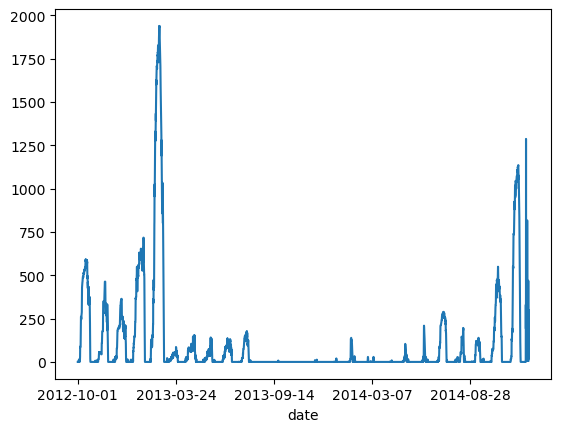

In [28]:
valid_ua_swe['SWE_UA'].plot()

In [29]:
n_by_label = valid_ua_swe.groupby("label")["SWE_UA"]
n_by_label['0003f387-71c4-48f6-b2b0-d853bd4f0aba']

IndexError: Column(s) SWE_UA already selected

In [30]:
#n_by_label['0003f387-71c4-48f6-b2b0-d853bd4f0aba'].plot()

In [31]:
def snotel_data(path_snotel):
    snotel_obs = pd.read_csv(path_snotel, sep='\s+', header=None)
    snotel_obs.columns = ['year', 'month', 'day', 'daily_P_in', 'Tmax_F', 'Tmin_F', 'Tmean_F', 'SWE_in']
    snotel_obs['Tmean_C'] = (snotel_obs['Tmean_F'] - 32) * (5 / 9)
    snotel_obs = snotel_obs.set_index(pd.DatetimeIndex(pd.to_datetime(snotel_obs[['year', 'month', 'day']])))
    snotel_obs['SWE_m'] = snotel_obs['SWE_in'] * 0.0254
    snotel_obs['datetime'] = snotel_obs.index
    calc_water_year_apply(snotel_obs)
    return snotel_obs